##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
im = pd.read_excel('AustraliaFiltered_srajend5.xlsx',index_col=0)
im

,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
224,Afghanistan,Asia,Southern Asia,Developing regions,10,20,30,30,70,100,...,100,20,40,70,80,110,180,140,560,4630
225,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,110,110,200,250,140,130,110,110,140,1910
226,Algeria,Africa,Northern Africa,Developing regions,10,50,30,10,20,20,...,20,30,60,20,20,50,30,30,60,730
227,American Samoa,Oceania,Polynesia,Developing regions,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,10,30
228,Andorra,Europe,Southern Europe,Developed regions,0,0,10,0,0,0,...,0,10,10,0,10,10,0,10,10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Wallis and Futuna Islands,Oceania,Polynesia,Developing regions,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,10
442,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,Yemen,Asia,Western Asia,Developing regions,10,0,0,10,20,10,...,20,60,40,150,40,20,10,40,40,570
444,Zambia,Africa,Eastern Africa,Developing regions,150,110,120,180,130,170,...,100,190,260,430,370,240,410,410,400,5590


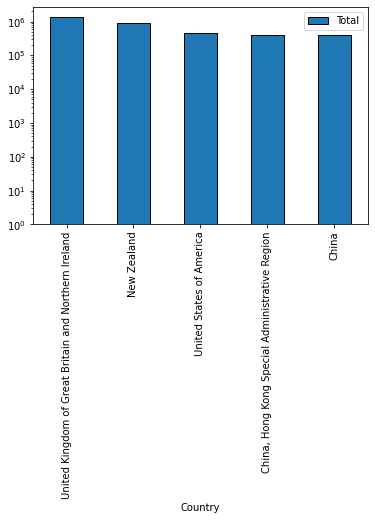

In [59]:
# Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
im.nlargest(5,'Total')[['Country','Total']].set_index('Country').plot(kind='bar',log=True,edgecolor='black')

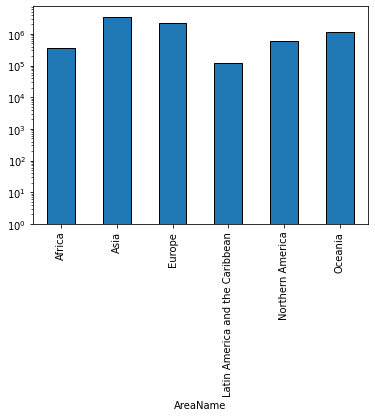

In [58]:
# Find total immigrants from each category by area name and plot barchart for each area
(im.groupby(by=['AreaName']))['Total'].sum().plot(kind='bar',log=True,edgecolor='black')


Text(0, 0.5, 'World Immigration')

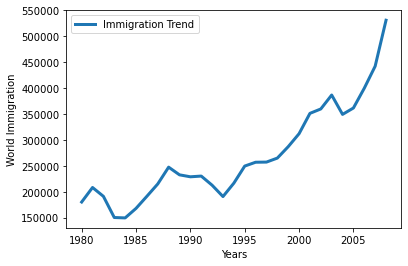

In [266]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
im.loc[:,'1980':'2008'].sum().plot(kind='line',label='Immigration Trend',linewidth=3)
plt.legend()
plt.xlabel('Years')
plt.ylabel('World Immigration')

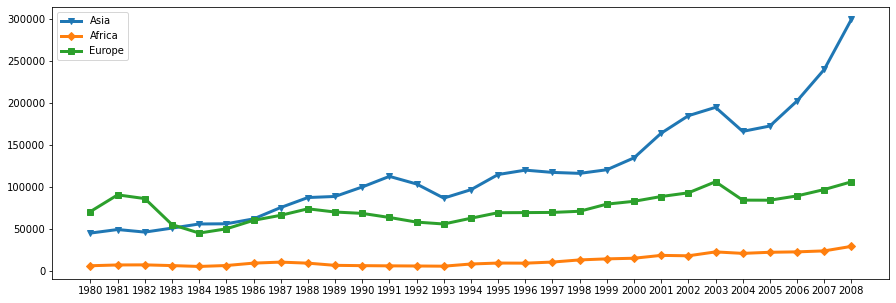

In [273]:
# Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
plt.figure(figsize=(15,5))
plt.plot(im.loc[im['AreaName']=='Asia','1980':'2008'].sum().index,im.loc[im['AreaName']=='Asia','1980':'2008'].sum().values,label='Asia',linewidth=3,marker='v')
plt.plot(im.loc[im['AreaName']=='Africa','1980':'2008'].sum().index,im.loc[im['AreaName']=='Africa','1980':'2008'].sum().values,label='Africa',linewidth=3,marker='D')
plt.plot(im.loc[im['AreaName']=='Europe','1980':'2008'].sum().index,im.loc[im['AreaName']=='Europe','1980':'2008'].sum().values,label='Europe',linewidth=3,marker='s')
plt.legend()
plt.show()

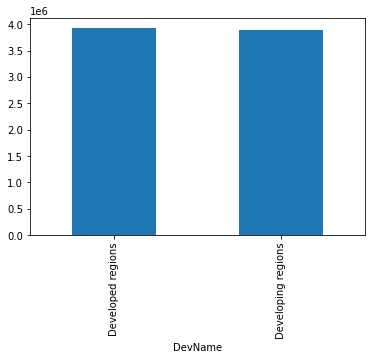

In [133]:
# Plot Total Immigrants based on DevelopmenRegion
im.groupby(by=['DevName'])['Total'].sum().plot(kind='bar')

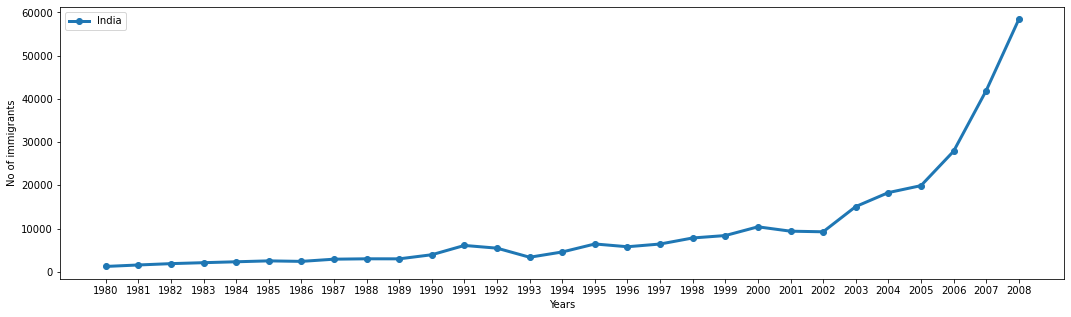

In [235]:
# Plot immigration trend for India using line plo
plt.figure(figsize=(18,5))
plt.plot(im.loc[im['Country']=='India','1980':'2008'].sum().index,im.loc[im['Country']=='India','1980':'2008'].sum().values,label='India',linewidth=3,marker='o')
plt.xlabel("Years")
plt.ylabel("No of immigrants")
plt.legend()
plt.show()

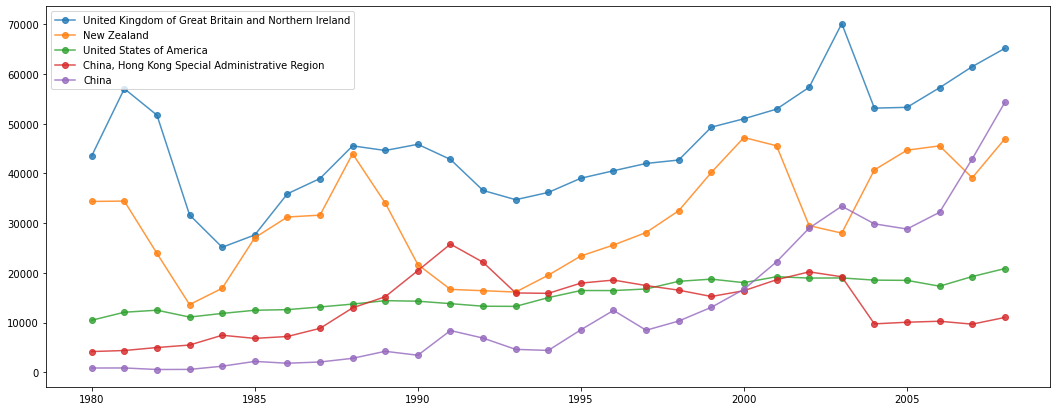

In [258]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
plt.figure(figsize=(18,7))
for i in im.nlargest(5,'Total').set_index('Country').index:    
    im.nlargest(5,'Total').set_index('Country').loc[:,'1980':'2008'].loc[i].plot(kind='line',marker='o',alpha=0.8)
plt.legend(loc ='upper left')

# Alternative 

#using list comprehension
##    plt.figure(figsize=(18,8))
##    ee =[im.nlargest(5,'Total').set_index('Country').loc[:,'1980':'2008'].loc[i].plot(kind='line',marker='o',alpha=0.8) for i in im.nlargest(5,'Total').set_index('Country').index]
##    plt.legend()

# The above technique is used in upcoming plots


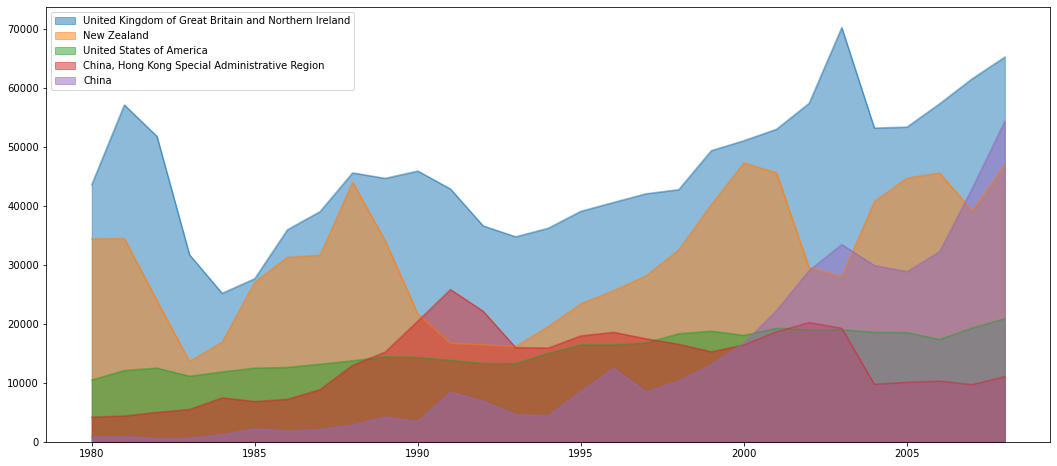

In [254]:
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(18,8))
ee =[im.nlargest(5,'Total').set_index('Country').loc[:,'1980':'2008'].loc[i].plot.area(alpha=0.5,stacked=False) for i in im.nlargest(5,'Total').set_index('Country').index]
plt.legend()   

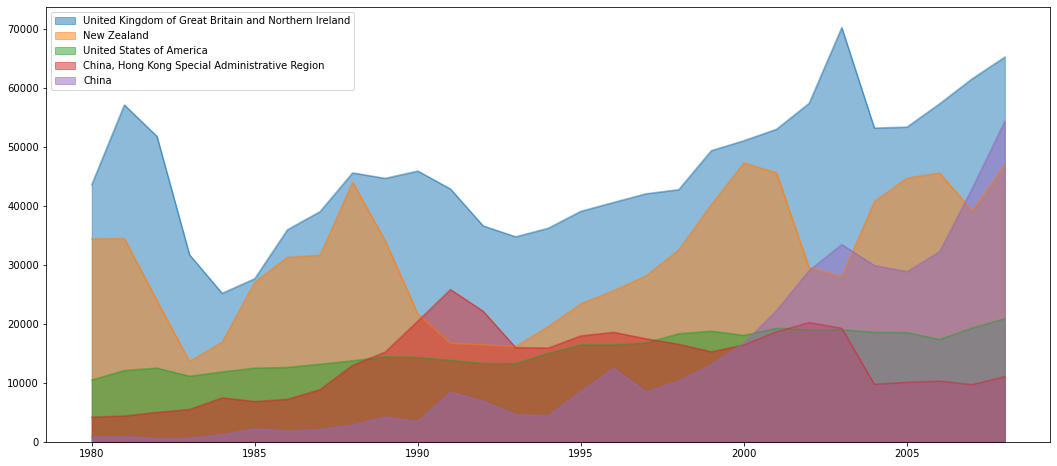

In [255]:
plt.figure(figsize=(18,8))
ee =[im.nlargest(5,'Total').set_index('Country').loc[:,'1980':'2008'].loc[i].plot.area(alpha=0.5,stacked=True) for i in im.nlargest(5,'Total').set_index('Country').index]
plt.legend()